In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
df = pd.read_excel(r"C:\Users\Pratik\Downloads\data_final.xlsx")
df

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [19]:
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [20]:
df.shape

(100, 3)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [22]:
df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [23]:
df.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

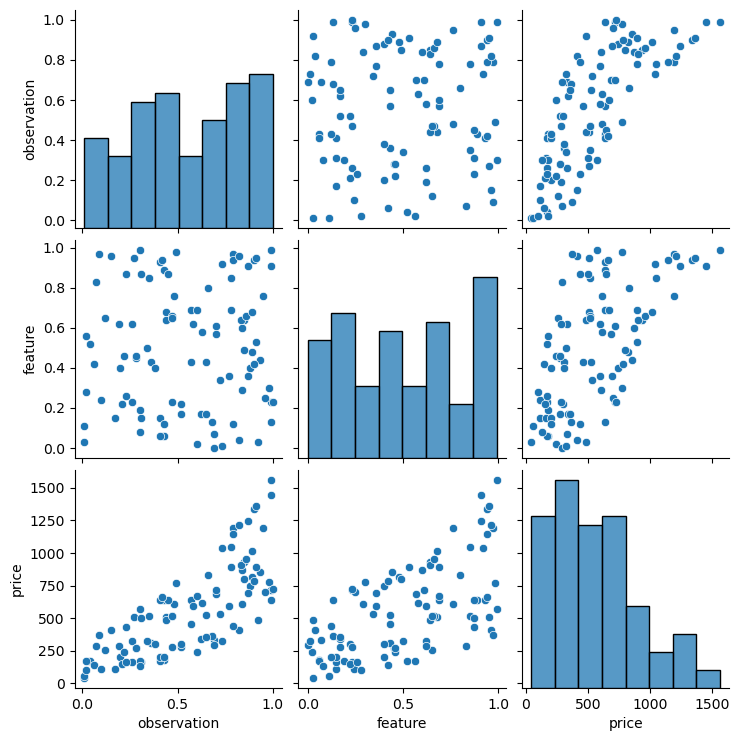

In [24]:
sns.pairplot(df)

In [25]:
# Independent and Dependent variables

X = df.iloc[:,:-1].values

y = df.iloc[:,-1].values

In [26]:
X.shape , y.shape

((100, 2), (100,))

In [27]:
#Train and Test Data

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [28]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((67, 2), (33, 2), (67,), (33,))

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = reg.predict(X_test)
y_pred

array([ 422.81092199,   47.3117882 ,  673.47663105,   57.68448711,
        653.51497592,  228.41131427,  586.76861722,  572.31598687,
        677.55656248,  701.96695506,  754.89073698,  978.30316384,
       1061.45374137, 1160.50910794,  523.60276016,  395.42701601,
        992.49454662,  106.29015537,  896.38962812,  703.96467422,
        422.44211598,  170.43180667,  275.77994073,  845.07169401,
       1085.62595172, -247.14204568,  994.10039444,  657.07241222,
        733.93022227,  937.96491688,  897.62666993,  814.10728639,
        728.26750836])

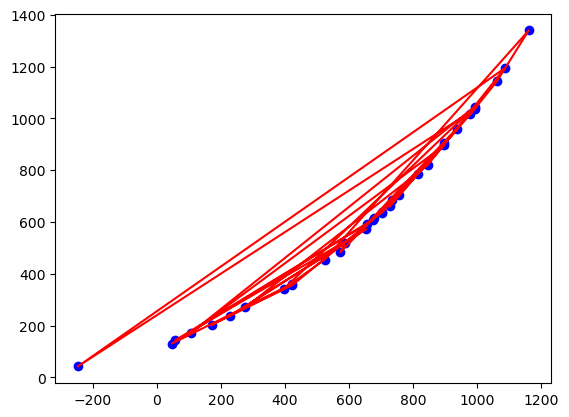

In [34]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_pred,y_test,color='red')

In [35]:
reg.predict([[0.34,0.68]])

array([483.02633098])

In [37]:
reg.predict([[0.33,0.19]])

array([147.60419658])

In [38]:
from sklearn import metrics as sm

In [39]:
# Model Performance
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 64.79
Mean squared error(MSE) = 6893.9
Median absolute error = 63.21
Explain variance score = 0.94


In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lg1 = LinearRegression()
lg1.fit(X_poly,y_train)

LinearRegression()

In [41]:
y_pred1 = lg1.predict(poly_reg.fit_transform(X_test))
y_pred1

array([ 359.75976199,  131.68218142,  610.25321634,  149.21839813,
        565.70476871,  237.32776414,  520.95984491,  484.01063981,
        620.99264658,  631.87647431,  704.04970819, 1027.89797017,
       1151.40826113, 1331.94059362,  461.42089638,  341.20348876,
       1042.75661496,  170.30867277,  904.41563338,  635.41490761,
        362.40482444,  204.12101516,  266.88411561,  831.11222225,
       1205.59511066,   41.00053444, 1039.87078205,  595.13955572,
        687.50938689,  965.50286138,  905.63644023,  787.83921136,
        659.7042353 ])

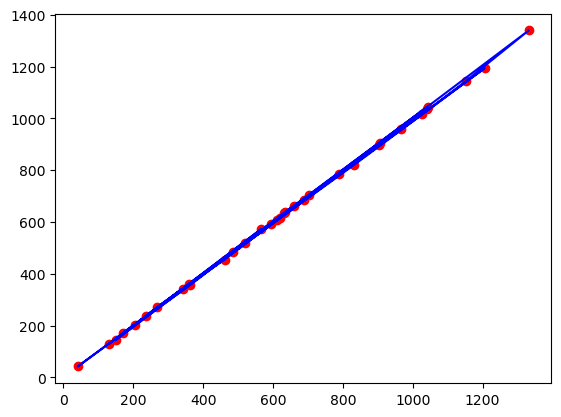

In [42]:
plt.scatter(y_pred1,y_test,color='red')
plt.plot(y_pred1,y_test,color='blue')

In [ ]:
#I would suggest chandrashekhar as exponential increase in prices as he goes nearer to urban spaces
#so he must take descion as per his convinience for highways side
#in price column as we goo above range of 1000 the range reduces shows unaffordability as per price increases
#above graphs plots shows inverse relation ship

